In [1]:
import pandas as pd
import nltk
nltk.download('all')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import string
import openpyxl as xls

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\parikshit
[nltk_data]    |     joshi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to C:\Users\parikshit
[nltk_data]    |     joshi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\parikshit
[nltk_data]    |     joshi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\parikshit
[nltk_data]    |     joshi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to


[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to C:\Users\parikshit
[nltk_data]    |     joshi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to C:\Users\parikshit
[nltk_data]    |     joshi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to C:\Users\parikshit
[nltk_data]    |     joshi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package nombank.1.0 to C:\Users\parikshit
[nltk_data]    |     joshi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\parikshit
[nltk_data]    |     joshi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nonbreaking_prefix

[nltk_data]    |   Package switchboard is already up-to-date!
[nltk_data]    | Downloading package tagsets to C:\Users\parikshit
[nltk_data]    |     joshi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package tagsets is already up-to-date!
[nltk_data]    | Downloading package timit to C:\Users\parikshit
[nltk_data]    |     joshi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package timit is already up-to-date!
[nltk_data]    | Downloading package toolbox to C:\Users\parikshit
[nltk_data]    |     joshi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package toolbox is already up-to-date!
[nltk_data]    | Downloading package treebank to C:\Users\parikshit
[nltk_data]    |     joshi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package treebank is already up-to-date!
[nltk_data]    | Downloading package twitter_samples to
[nltk_data]    |     C:\Users\parikshit
[nltk_data]    |     joshi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package twitter_samples is already up-to-date

In [2]:
df = pd.read_csv(r"final_file.csv")
df

title    year   genre ratings  \
0      star wars: episode vii - the force awakens  (2015)  action     7.8   
1      star wars: episode vii - the force awakens  (2015)  action     7.8   
2      star wars: episode vii - the force awakens  (2015)  action     7.8   
3      star wars: episode vii - the force awakens  (2015)  action     7.8   
4      star wars: episode vii - the force awakens  (2015)  action     7.8   
...                                           ...     ...     ...     ...   
28821                                   inception    2010   scifi    91.0   
28822                                   inception    2010   scifi    91.0   
28823                                   inception    2010   scifi    91.0   
28824                                   inception    2010   scifi    91.0   
28825                                   inception    2010   scifi    91.0   

       metascore                                            reviews  
0           80.0  Star Wars: The Force Awakens Is a newest chapt...  
1           80.0  This film really is nothing more than an Adver...  
2           80.0  When I go to the movies, I aim to experience o...  
3           80.0  30 years have passed since the events of episo...  
4           80.0  In October of 2012, almost five years ago next...  
...          ...                                                ...  
28821       87.0  If movies are shared dreams, then Christopher ...  
28822       87.0  A devilishly complicated, fiendishly enjoyable...  
28823       87.0  Inception is a masterpiece. Making a huge film...  
28824       87.0  a stunning achievement and the most completely...  
28825       87.0  Inception is an exhilarating cinematic experie...  

[28826 rows x 6 columns]

In [3]:
mask = df['reviews'].isnull()
df = df[~mask]

<AxesSubplot:title={'center':'Distribtution of Genre'}>

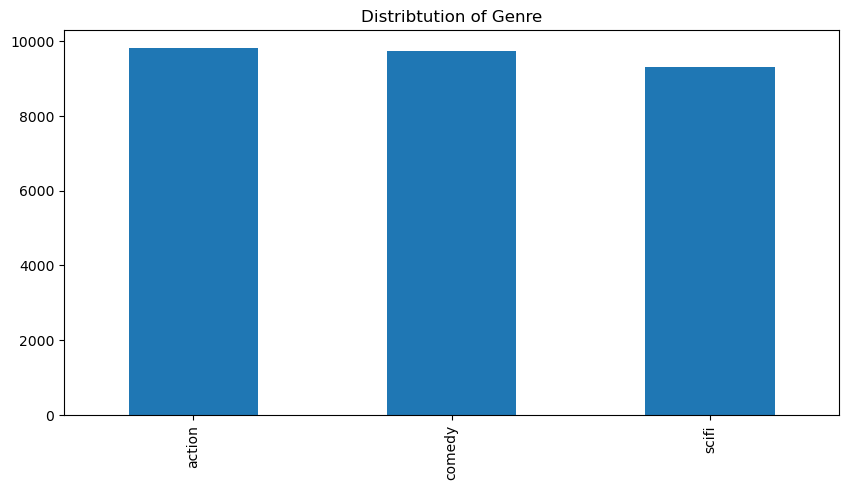

In [4]:
df['genre'].value_counts().sort_index().plot(kind='bar',title='Distribtution of Genre',figsize=(10,5))

In [5]:
# removed all the html tags,lengthen w/o to without,removed words with number,removed punctuations,removed extra whitespace
def clean_text_round1(review):
    text = str(review)
    text = re.sub(', ', ',', text)# remove punctuation
    text = re.sub('<br />', ' ', text)
    text = re.sub('<span/>', ' ', text)
    text = re.sub('</a>', '', text)
    text = re.sub('w\/out', ' without ', text)
    text = re.sub('w\/it', ' with it', text)
    text = re.sub('\$\w*', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('<[^>]+>', '', text)
    text = re.sub("'+\w", ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\s+', ' ', text)
    return text.lower()

round1 = lambda x: clean_text_round1(x)
pd.set_option('max_colwidth',900)
df['clean_part1'] = pd.DataFrame(df.reviews.apply(round1))

C:\Users\parikshit joshi\AppData\Local\Temp\ipykernel_43932\2696922046.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_part1'] = pd.DataFrame(df.reviews.apply(round1))


In [6]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
stop_words.remove('did')
stop_words.remove('do')
stop_words.remove('does')
stop_words.remove('not')

def rm_stopword(review):
    text = review
    word_tokens = word_tokenize(text)
    rm_stopwords = [w for w in word_tokens if not w.lower() in stop_words]
    rm_stopwords1 = " ".join([g for g in rm_stopwords])
    return rm_stopwords1

round4 = lambda x: rm_stopword(x)
df['rm_stopwords'] = pd.DataFrame(df.clean_part1.apply(round4))


C:\Users\parikshit joshi\AppData\Local\Temp\ipykernel_43932\1780722534.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rm_stopwords'] = pd.DataFrame(df.clean_part1.apply(round4))


In [7]:
from nltk.tokenize import MWETokenizer

def compound(review):
    text = review
    compound_words = [('does','not'),('do','not'),('did','not')]
    mwe_tokenizer = MWETokenizer(compound_words,separator='_')
    compound = mwe_tokenizer.tokenize(word_tokenize(text))
    compound1 = " ".join([g for g in compound])
    return compound1

roundz = lambda x: compound(x)
df['compound'] = pd.DataFrame(df.rm_stopwords.apply(roundz))

C:\Users\parikshit joshi\AppData\Local\Temp\ipykernel_43932\1989302356.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['compound'] = pd.DataFrame(df.rm_stopwords.apply(roundz))


In [8]:
import gensim
from gensim.parsing.porter import PorterStemmer
porter_stemmer = PorterStemmer()
def stem(review):
    text = review
    word_tokens = word_tokenize(text)
    stem = [porter_stemmer.stem(w) for w in word_tokens]
    stem1 = " ".join([g for g in stem])
    return stem1

round5 = lambda x: stem(x)
df['stem'] = pd.DataFrame(df.compound.apply(round5))

C:\Users\parikshit joshi\AppData\Local\Temp\ipykernel_43932\1645585894.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stem'] = pd.DataFrame(df.compound.apply(round5))


In [9]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

all_words = [word for sent in df.stem for word in word_tokenize(sent)]
all_words_frequency = FreqDist(all_words)
all_words_frequency.most_common(50)

[('movi', 43734),
 ('film', 41968),
 ('on', 21409),
 ('not', 20850),
 ('charact', 18340),
 ('like', 17707),
 ('time', 13374),
 ('stori', 12502),
 ('make', 12182),
 ('good', 11995),
 ('great', 10992),
 ('see', 10311),
 ('realli', 9947),
 ('first', 9940),
 ('scene', 9940),
 ('action', 9785),
 ('get', 9431),
 ('well', 9427),
 ('even', 8969),
 ('much', 8944),
 ('best', 8826),
 ('also', 8738),
 ('love', 8479),
 ('man', 8255),
 ('watch', 7988),
 ('end', 7923),
 ('war', 7632),
 ('would', 7398),
 ('feel', 7179),
 ('us', 7156),
 ('wai', 7142),
 ('go', 7119),
 ('star', 6911),
 ('e', 6792),
 ('thing', 6353),
 ('new', 6109),
 ('think', 6019),
 ('come', 5946),
 ('peopl', 5831),
 ('do', 5818),
 ('still', 5782),
 ('could', 5736),
 ('look', 5694),
 ('sai', 5649),
 ('made', 5556),
 ('two', 5535),
 ('year', 5514),
 ('mani', 5464),
 ('world', 5414),
 ('take', 5401)]

In [10]:
common_words_list = [i for i,v in all_words_frequency.most_common() if v <5]

In [11]:
for i,v in all_words_frequency.most_common(50):
    common_words_list.append(i)
common_words_list.remove('good')
common_words_list.remove('great')
common_words_list.remove('love')

In [12]:
def rm_common(review):
    text = review
    word_tokens = word_tokenize(text)
    rm_common = [w for w in word_tokens if not w.lower() in common_words_list]
    rm_common1 = " ".join([g for g in rm_common])
    return rm_common1

round7 = lambda x: rm_common(x)
df['final'] = pd.DataFrame(df.stem.apply(round7))

C:\Users\parikshit joshi\AppData\Local\Temp\ipykernel_43932\3510130507.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['final'] = pd.DataFrame(df.stem.apply(round7))


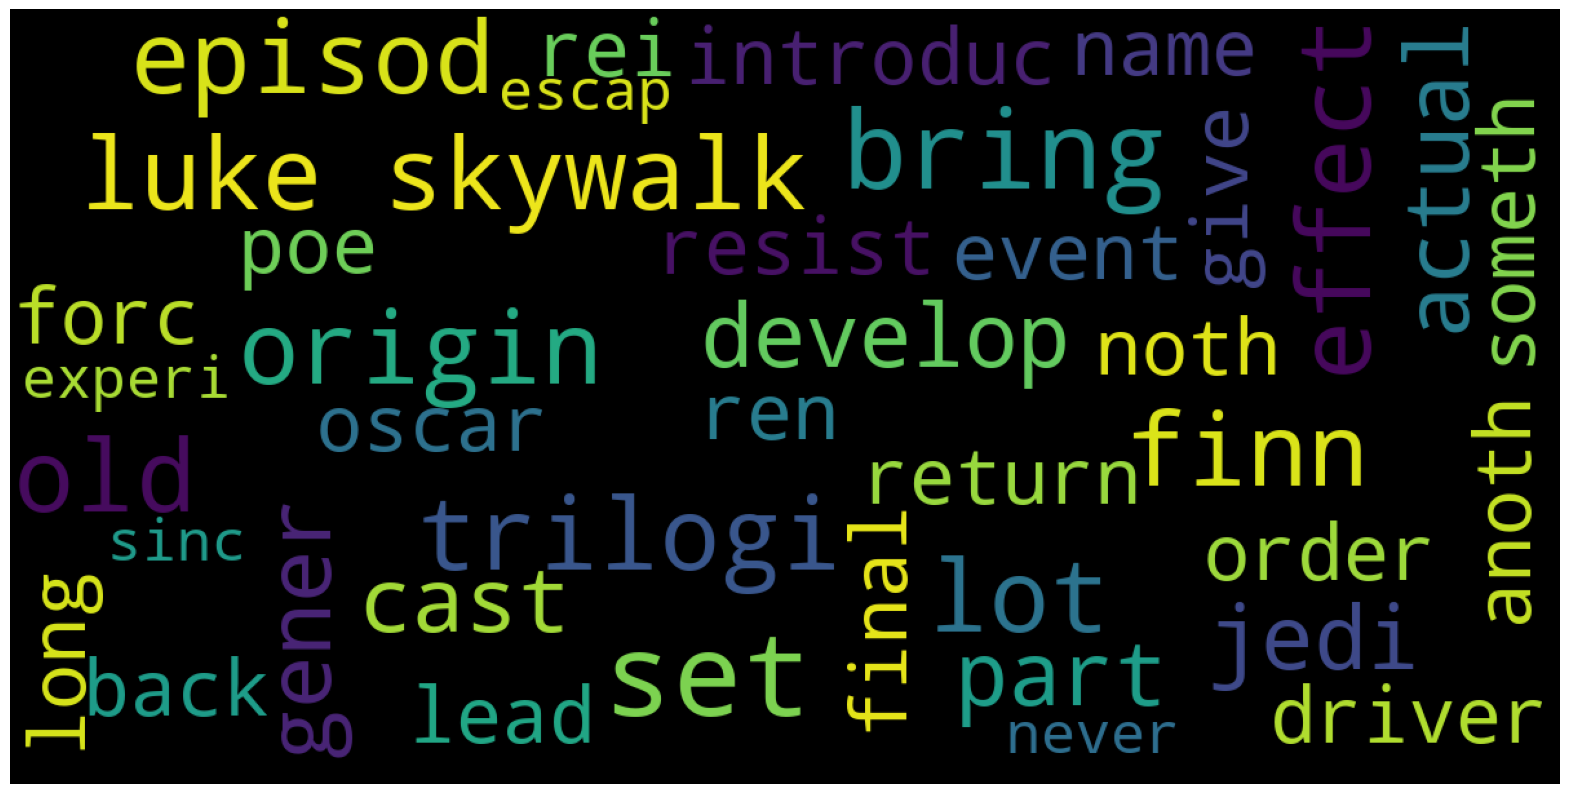

In [13]:
def Mywordcloud(data, title = None):
    wordcloud = WordCloud(
    background_color='black',
    max_words=40,
    max_font_size=30,
    scale=3,
    random_state=1
    ).generate(str(data) )

    fig = plt.figure(1, figsize=(20, 20))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

Mywordcloud(df['final'])

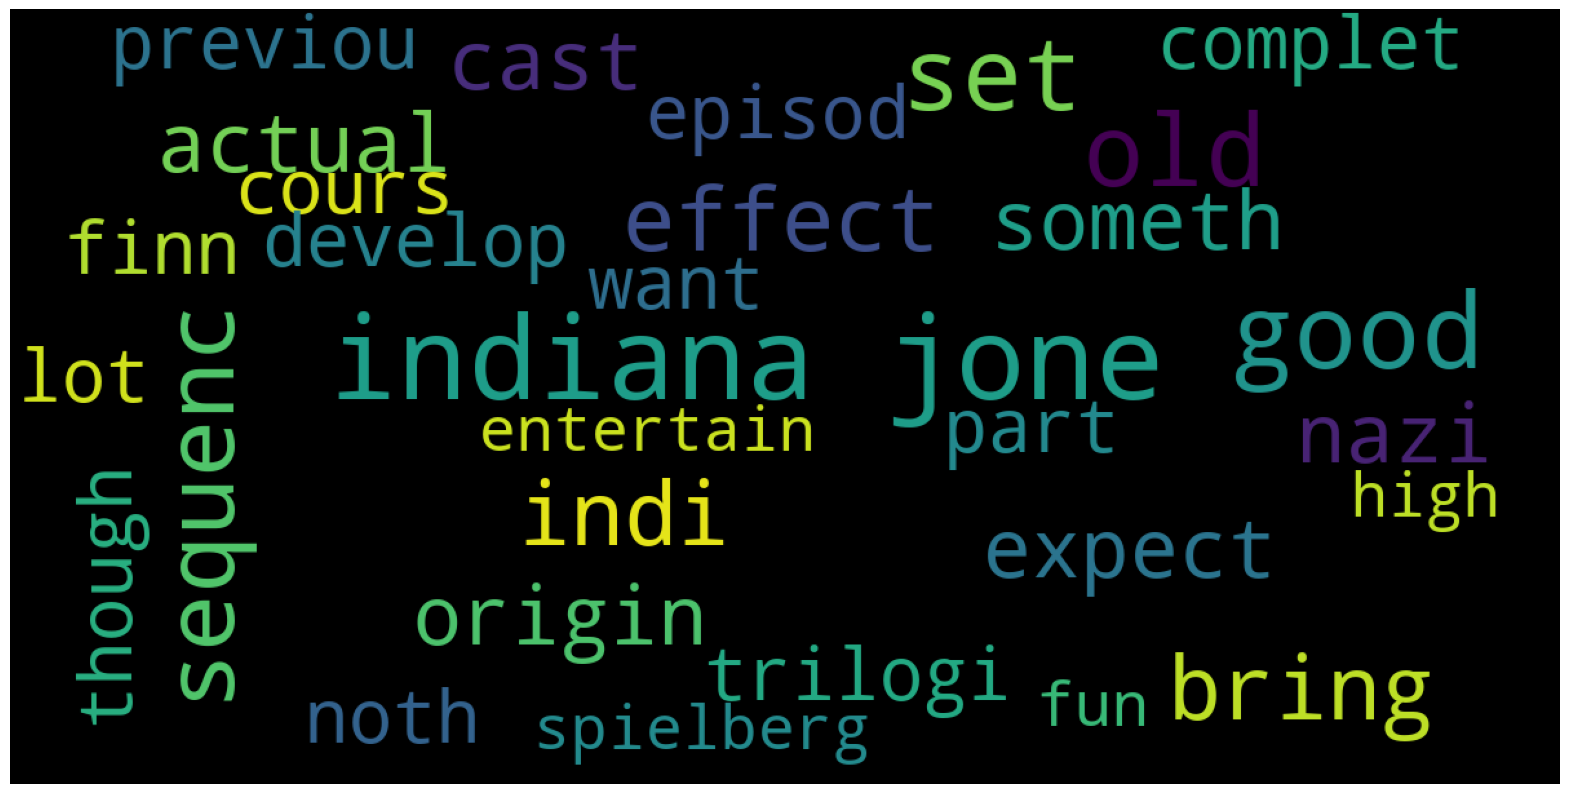

In [14]:
df_action = df.loc[df["genre"] =='action' ]
def Mywordcloud(data, title = None):
    wordcloud = WordCloud(
    background_color='black',
    max_words=30,
    max_font_size=30,
    scale=3,
    random_state=47
    ).generate(str(data) )

    fig = plt.figure(1, figsize=(20, 20))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

Mywordcloud(df_action['final'])

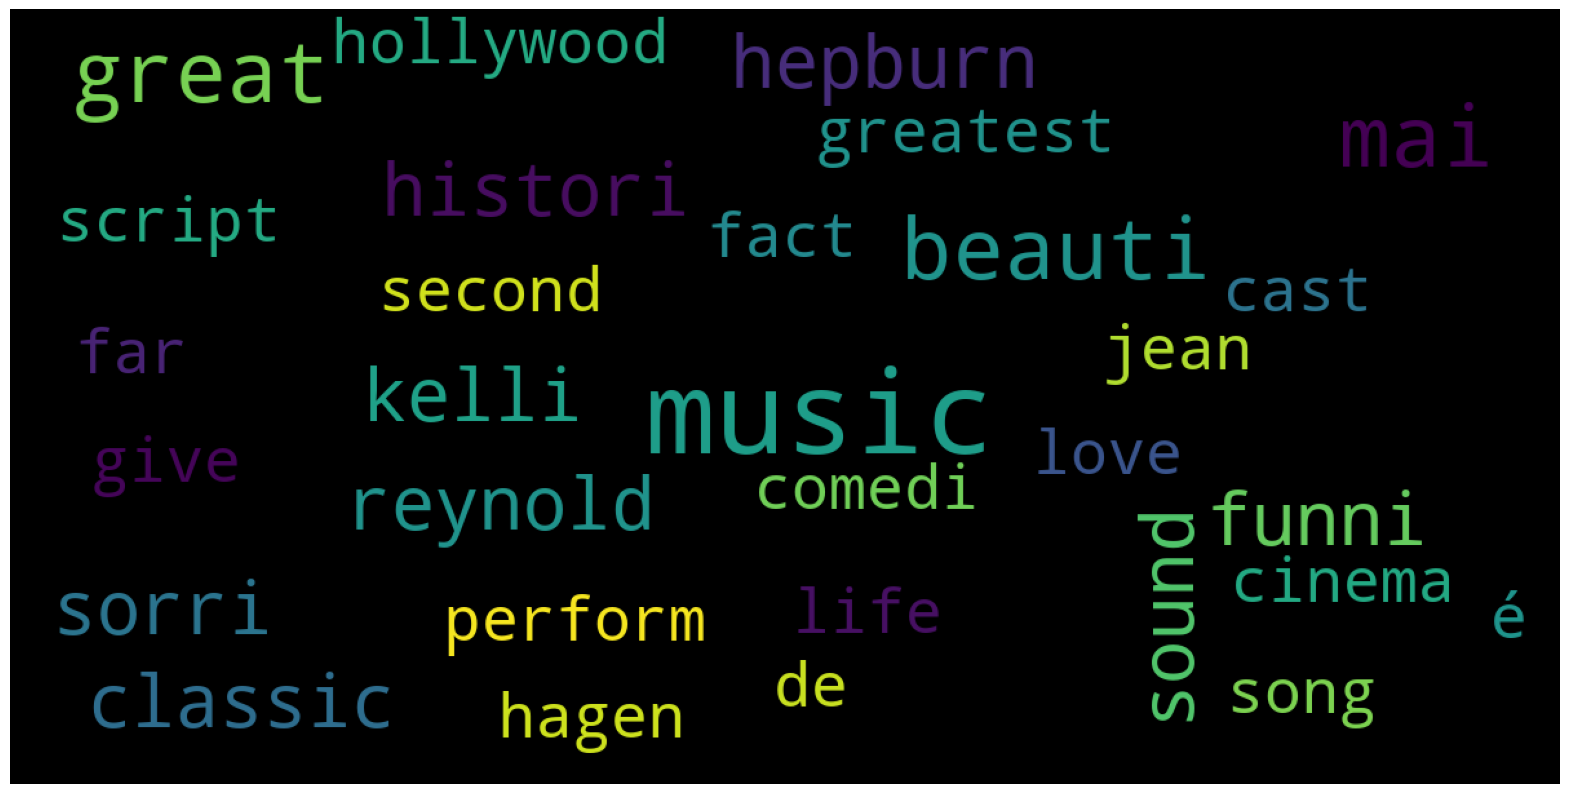

In [15]:
df_comedy = df.loc[df["genre"] =='comedy' ]
def Mywordcloud(data, title = None):
    wordcloud = WordCloud(
    background_color='black',
    max_words=30,
    max_font_size=30,
    scale=3,
    random_state=47
    ).generate(str(data) )

    fig = plt.figure(1, figsize=(20, 20))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

Mywordcloud(df_comedy['final'])

In [16]:
df_scifi = df.loc[df["genre"] =='scifi' ]
def Mywordcloud(data, title = None):
    wordcloud = WordCloud(
    background_color='black',
    max_words=30,
    max_font_size=30,
    scale=3,
    random_state=47
    ).generate(str(data) )

    fig = plt.figure(1, figsize=(20, 20))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

Mywordcloud(df_scifi['final'])

In [17]:
df.to_csv (r'C:\Users\parikshit joshi\Desktop\Poly\Y2\Y2S2\Wiu\ITBW51_210895h_cleaned_dataset.csv', index = None, header=True) 